<table>
<table border = 5  align = center bgcolor="white" cellspacing="10px">

<tr>
<td><a href="https://drive.google.com/file/d/1--wnF2vQE2nDQ8rC8iMa2A2Sk1tNwPwz/view?usp=sharing"> <img alt="Colaboratory logo" width="150px"  src="https://miro.medium.com/max/986/1*S2AyJcdw8EPcn7gwDVSBCA.png" align="left" hspace="10px" vspace="0px" /> </a> </td>
   
    
 
<td></td>
    
<td><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitmilab.redclara.net%2FhalleyUIS%2Fmoncora.git/4d1344cb6f0df9a23bce6fe9d70812719aeb0fe5?urlpath=lab%2Ftree%2FBook%2FJupyter_Notebooks%2FDatosII_a.ipynb"><img src="https://mybinder.org/static/images/logo_social.png" alt="Alternative text" width="150px"  /></a>
</td>

</tr>

</table>
    
<br>

---
    
# <strong>Los datos hablan II. Media Móvil</strong>

In [ ]:
!pip install APIMakeSens

In [17]:
import pandas as pd                   # Librería de manejo de datos en DataFrames
import numpy as np                    # Librería de cálculos matemáticos con Arrays
import matplotlib.pyplot as plt       # Librería de gráficas
import matplotlib.dates as mdates     # Módulo de manejo de fechas en las etiquetas de una gráfica
from MakeSens import MakeSens         # Libería de descarga de datos del proyecto RACIMO-MONCORA

## **Importación de datos**

In [24]:
fecha_inicio = "2023-09-04 00:00:00"
fecha_fin = "2023-10-04 23:59:00"
estacion = "mE1_00008"                      # FCUIS: 'mE1_00008'
frecuencia = "6H"  # 1T:1 unidad de tiempo / 1 minuto, 1H: 1 hora
                   # 1D: 1 día

data = MakeSens.download_data(estacion, fecha_inicio, fecha_fin, frecuencia)

## **Selección de datos Material Particulado**

In [25]:
# Selección de columnas
columnas = ["pm10_1", "pm10_2","pm25_1", "pm25_2", "pm1_1", "pm1_2", 'ts']
pm_data = data[columnas]

# Ajuste del índice de la tabla de datos. Ponemos el tiempo como índice:
pm_data = pm_data.set_index('ts')
pm_data.index = pd.to_datetime(pm_data.index)

#pm_data

## **Limpiando datos**

Para que sea un poco más sencillo manejar nuestros datos, definiremos un nuevo DataFrame para almacenar solo con las variables de material particulado. Luego convertiremos el índice de los datos a formato de fecha y hora con la función ```to_datetime()```.

In [26]:
columnas = pm_data.columns # Guardamos los nombres de las columnas en una lista
for col in columnas:                                             # Iteramos entre cada columna
    pm_data[col] = pm_data[col].where(pm_data[col]<120, np.nan)  # Reemplazamos los valores mayores a 120 por NaN

In [28]:
show = False         #  Muestra la grafica si es verdadero.
if show:
    # Graficamos los datos limpios de pm10 
    fig = plt.figure(figsize=(12, 6))            # Figura
    ax = fig.gca()                               # Ejes
    plt.plot(pm_data.index, pm_data['pm10_1'], '.',label = 'Sensor 1', alpha=0.7)   # Datos pm10_1
    plt.plot(pm_data.index, pm_data['pm10_2'], '.',label = 'Sensor 2', alpha=0.7)   # Datos pm10_2

    # Configuramos etiquetas
    plt.title("Datos de PM 10", fontsize=20)
    plt.xlabel("Fecha",         fontsize=15)
    plt.ylabel(r"Concentración [$\mu g/m^3$]", fontsize=15)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))     # Formato de fecha: %b: mes, %d: día, %Y: año
    plt.grid(alpha=0.5, linestyle="--")
    plt.legend(fontsize=12)
    plt.show()

## **Media móvil**

In [20]:
N = 60
x = np.linspace(-np.pi/2,np.pi*5/2,N)
y = np.cos(x) + np.random.random(N)*0.8

width = 10

def frame(a):
    if a==0:
        plt.legend()
    b = a+width+1
    plt.plot(x,y,'o',color='blue',ms=15, label='datos')
    plt.plot(x[a:b],y[a:b],'o',color='orange',ms=15,label='ventana')



    xrolling = []; yrolling = []
    for i in range(0,a+1):
        j = i+width+1
        xrolling.append(np.mean(x[i:j]))
        yrolling.append(np.mean(y[i:j]))
    plt.plot(xrolling, yrolling,'o',color='red',ms=10,label='resultado')
    

In [21]:
import matplotlib.animation as animation
%matplotlib auto
%matplotlib auto

Using matplotlib backend: TkAgg
Using matplotlib backend: TkAgg


In [22]:
fig = plt.figure(figsize=(12,5))
plt.title('Ventaneo de una función')
ani=animation.FuncAnimation(fig,frame,range(0,N-width, 1), repeat=False, interval=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [ ]:
# Para Google colab solamente
# from matplotlib import rc
# rc('animation', html='jshtml')
# ani

Ya hemos eliminado los datos atípicos, sin embargo, mirando los datos es difícil ver la tendencia. Para arreglar esto, suavicemos  las curvas. Debemos realizar un cálculo de la media móvil, esto lo hacemos mediante la funciones ```.rolling()```  y ```.mean()``` de Pandas.

<div class="alert alert-block alert-info">
<b>¿Qué es la media móvil?</b>  Una **media móvil** es una técnica de suavizado de datos que se utiliza para analizar datos que **fluctúan con el tiempo**. En este caso, la media móvil se calcula en una ventana de tiempo, y se desplaza a lo largo de los datos.
  
 **¿Cómo se calcula la media móvil?** 
La media móvil se calcula como el promedio de los datos en la ventana de tiempo. Por ejemplo, si la ventana de tiempo es de 3 horas, la media móvil en el tiempo $t$ se calcula como: $$\frac{PM_{10}(t-1) + PM_{10}(t) + PM_{10}(t+1)}{3}$$

 A diferencia de otros métodos de suavizado, como el promedio, la media móvil nos permite ver la **tendencia de los datos**, sin **perder información** sobre los picos y valles. Ahí radica su utilidad e importancia.
</div>  


La función ```.rolling()``` proporciona **ventanas deslizantes** sobre los datos. En estas ventanas resultantes, podemos realizar cálculos utilizando una función estadística (en este caso, la media). El tamaño de la ventana (número de períodos o cantidad de datos) se puede especificar en el argumento ```window```.

> Antes de usar la función ```.rolling()```, debes tener claro cual es el fenomeno que quieres estudiar y su escala de tiempo típica. Recuerdas que el ancho de la ventana que vas a usar, depende fuertemente de esto.

In [29]:
%matplotlib inline

In [39]:
ventana = 20         # Tamaño de la ventana en cantidad de datos
min_periods = 1        # Mínimo numero de datos en una ventana para calcular el promedio, de lo contrario el resultado es np.nan
for col in columnas:
    pm_data[col+'_r'] = pm_data[col].rolling(window=ventana, min_periods=min_periods).mean()  #Calculemos la media móvil

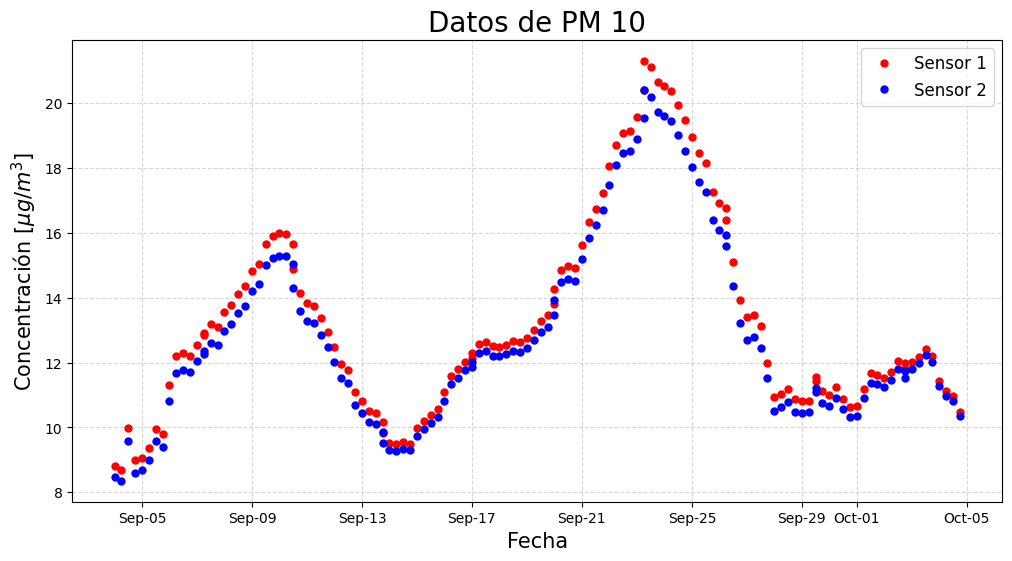

In [40]:
# Graficamos pm10 
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
plt.plot(pm_data.index, pm_data['pm10_1_r'], '.',color='red', label = 'Sensor 1', alpha=1, ms=10)
plt.plot(pm_data.index, pm_data['pm10_2_r'], '.',color='blue',label = 'Sensor 2', alpha=1, ms=10)

# Configuramos etiquetas
plt.title("Datos de PM 10", fontsize=20)
plt.xlabel("Fecha",         fontsize=15)
plt.ylabel(r"Concentración [$\mu g/m^3$]", fontsize=15)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))     # Formato de fecha: %b: mes, %d: día, %Y: año
plt.grid(alpha=0.5, linestyle="--")
plt.legend(fontsize=12)
plt.show()

Dado que los datos están registrados por hora, el argumento ```window=24```, que toma 24 datos ¿Qué pasa si usamos una ventana de 12 datos? ¿Y si usamos una ventana de 3 datos?

> Hemos eliminado los valores atípicos y suavizado los datos. ¿Qué más podemos hacer para mejorar el análisis?